## Logistic regression
### BMI class prediction from height, weight and gender

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('bmi.csv')
df.head()


,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
df['BMI'] = df['Weight'] / ((df['Height']/100)**2)

def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)
df['Gender_enc'] = LabelEncoder().fit_transform(df['Gender'])
df.head()


,Gender,Height,Weight,Index,BMI,BMI_Category,Gender_enc
0,Male,174,96,4,31.708284,Obese,1
1,Male,189,87,2,24.355421,Normal,1
2,Female,185,110,4,32.140248,Obese,0
3,Female,195,104,3,27.350427,Overweight,0
4,Male,149,61,3,27.476240,Overweight,1


In [4]:
X = df[['Gender_enc', 'Height', 'Weight']]
y = df['BMI_Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
clf.fit(X_train_scaled, y_train)


c:\Users\mcw\Desktop\Basic_ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'multinomial'


In [6]:
y_pred = clf.predict(X_test_scaled)


In [7]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.93

Classification Report:
               precision    recall  f1-score   support

      Normal       0.85      0.85      0.85        13
       Obese       0.96      1.00      0.98        66
  Overweight       0.83      0.71      0.77        14
 Underweight       1.00      0.86      0.92         7

    accuracy                           0.93       100
   macro avg       0.91      0.85      0.88       100
weighted avg       0.93      0.93      0.93       100



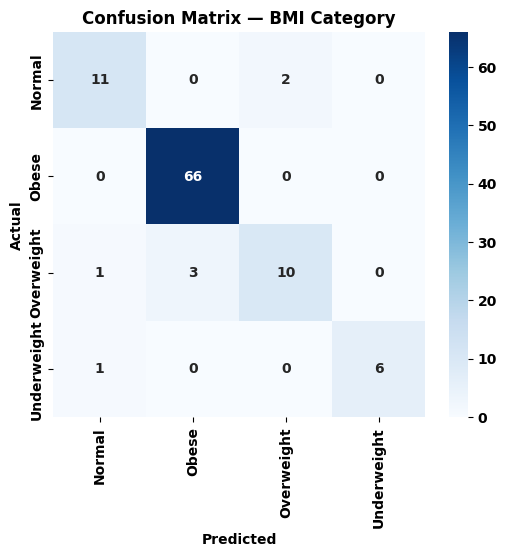

In [8]:
plt.figure(figsize=(6,5))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=clf.classes_,
    yticklabels=clf.classes_
)
plt.title('Confusion Matrix — BMI Category')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [9]:
sample = pd.DataFrame({
    'Gender_enc': [1],
    'Height': [172],
    'Weight': [100]
})

sample_scaled = scaler.transform(sample)
predicted_category = clf.predict(sample_scaled)[0]
predicted_proba = clf.predict_proba(sample_scaled)[0]

print(f"Example Input → Male, Height=172cm, Weight=100kg")
print(f"Predicted BMI Category: {predicted_category}")
print("\nClass Probabilities:")
for cls, prob in zip(clf.classes_, predicted_proba):
    print(f"{cls}: {prob:.3f}")


Example Input → Male, Height=172cm, Weight=100kg
Predicted BMI Category: Obese

Class Probabilities:
Normal: 0.014
Obese: 0.817
Overweight: 0.169
Underweight: 0.000
